Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [90]:
import glob
import os

#create path 'Processed' into working directory if non-existent
dirName = 'Processed'

# Create target Directory if don't exist
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:
    print("Directory " , dirName ,  " already exists")

PATH = os.getcwd()+ "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634  
    
#create a list and append to it all the data of the csv's    
list_ = []

for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

#create dataframe by concatenating the list    
df_concatenated = pd.concat(list_, axis=0, ignore_index=True)

# use pd.set_option here to display in a nice way
# only display 30 rows
pd.set_option("display.max_rows", 30)
# displays precision for decimal numbers
pd.set_option("display.precision", 3)
print(df_concatenated)

# save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
df_concatenated.to_csv(DATAPATH)

Directory  Processed  already exists
     SubjectID  StimulusType  response  RT 
0     1001      1             1         668
1     1001      0             0           0
2     1001      1             1         389
3     1001      1             1         454
4     1001      1             1         362
5     1001      1             1         377
6     1001      1             1         376
7     1001      1             1         364
8     1001      0             0           0
9     1001      0             0           0
10    1001      1             1         383
11    1001      1             1         410
12    1001      1             1         378
13    1001      1             1         317
14    1001      1             1         311
...        ...           ...       ...  ...
8285     5      1             1         671
8286     5      1             1         704
8287     5      0             0           0
8288     5      1             1         451
8289     5      1             1        

### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [89]:
# add a column "congruence" with truth values according to StimulusType == response
df_concatenated['congruence'] = np.where(df_concatenated['StimulusType'] == df_concatenated['response'],True,False)

# create a new dataframe with averaged data
df_concatenated_avg = pd.DataFrame(df_concatenated, columns = ['SubjectID', 'StimulusType', 'RT', 'congruence'])

#create a working data frame that we want to manipulate
working_frame = pd.DataFrame(df_concatenated_avg, columns = ['SubjectID', 'StimulusType', 'RT'])

#replace all 0 values to NaN in order to compute mean without the 0 Value
working_frame['RT'] = working_frame['RT'].replace(0,np.NaN)
#group by SubjectID and StimulusType then compute the mean for each group
working_frame['RT'] = working_frame['RT'].groupby([working_frame['SubjectID'],
                                                   working_frame['StimulusType']]).transform('mean') 


#replace all values by their respective group means, also making sure to skip the 0s!
df_concatenated_avg.loc[df_concatenated_avg.RT != 0, 'RT'] = working_frame['RT'].copy()

#rename congruence column into accuracy
df_concatenated_avg.rename(columns={'congruence': 'accuracy'}, inplace=True)

print(df_concatenated_avg.head())
# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH)



  SubjectID  StimulusType  RT       accuracy
0  1001      1             408.762  True    
1  1001      0               0.000  True    
2  1001      1             408.762  True    
3  1001      1             408.762  True    
4  1001      1             408.762  True    


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

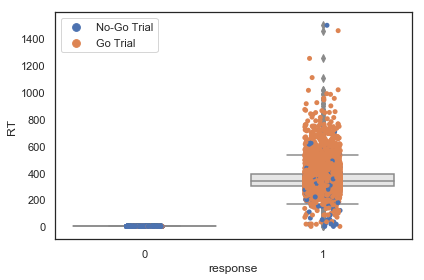

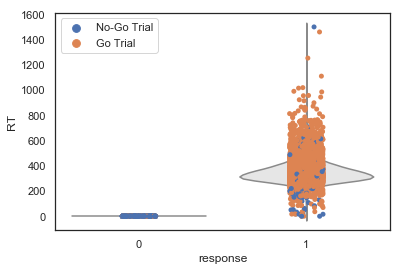

In [63]:
"""
masking 0's?
"""
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")

# create firt plot
fig, axes = plt.subplots(nrows=1,ncols=1)

# first subplot with stripplot and boxplot
axes = sns.boxplot(data = data_concat, x='response', y ='RT', color = '0.9')
axes = sns.stripplot(data = data_concat, x='response', y ='RT', hue = 'StimulusType', jitter = True)


# create second plot
fig2, axes2 = plt.subplots(nrows=1,ncols=1)

# second subplot with stripplot and violinplot
axes2 = sns.violinplot(data = data_concat, x='response', y = 'RT', inner = None, color='0.9')
axes2 = sns.stripplot(data = data_concat, x='response', y ='RT', hue='StimulusType', jitter =True)

handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['No-Go Trial', 'Go Trial'])

handles, _ = axes2.get_legend_handles_labels()
axes2.legend(handles, ['No-Go Trial', 'Go Trial'])

fig.tight_layout()

# b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

     SubjectID  StimulusType          RT  accuracy
0         1001             1  408.762500      True
1         1001             0    0.000000      True
2         1001             1  408.762500      True
3         1001             1  408.762500      True
4         1001             1  408.762500      True
5         1001             1  408.762500      True
6         1001             1  408.762500      True
7         1001             1  408.762500      True
8         1001             0    0.000000      True
9         1001             0    0.000000      True
10        1001             1  408.762500      True
11        1001             1  408.762500      True
12        1001             1  408.762500      True
13        1001             1  408.762500      True
14        1001             1  408.762500      True
15        1001             1  408.762500      True
16        1001             1  408.762500      True
17        1001             1  408.762500      True
18        1001             0   

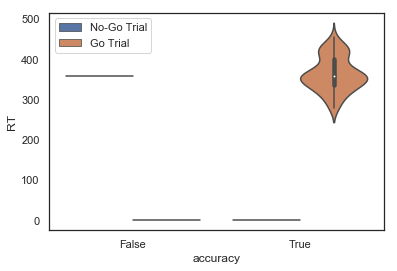

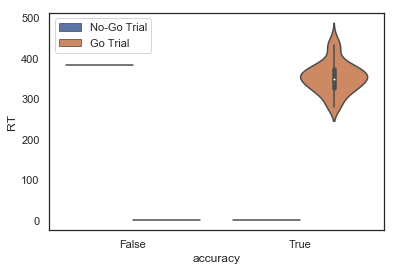

In [70]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
data_concat_avg  = pd.read_csv(os.getcwd() + "/Processed/data_concatenated_averaged.csv", index_col = [0])

print(data_concat_avg)

# Now it's time to plot your results
figs, axes = plt.subplots(nrows=1, ncols=1, sharey="row")

# violin plot for your group's data
axes = sns.violinplot(data = data_concat_avg.sample(n=80), x = 'accuracy', y = 'RT', hue = 'StimulusType') 

# second figure 
figs2, axes2 = plt.subplots(nrows=1, ncols=1, sharey="row")

# violin plot of all group's data
axes2 = sns.violinplot(data = data_concat_avg.sample(n=80), x = 'accuracy', y = 'RT', hue = 'StimulusType') 

handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['No-Go Trial', 'Go Trial'])

handles, _ = axes2.get_legend_handles_labels()
axes2.legend(handles, ['No-Go Trial', 'Go Trial'])

fig.tight_layout()

Compare two datasets and relate it with CLT. Write your opinion here.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

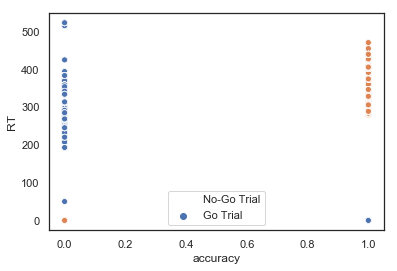

In [71]:
figs, axes = plt.subplots(nrows=1, ncols=1, sharey="row")

axes = sns.scatterplot(data = data_concat_avg, x = 'accuracy', y = 'RT', hue = 'StimulusType')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['No-Go Trial', 'Go Trial'])